<a href="https://colab.research.google.com/github/angelsmreyes/PortfolioProjects/blob/main/Movie_Correlation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure

plt.style.use('fivethirtyeight')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

### **Data Description**

There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

**budget**: the budget of a movie. Some movies don't have this, so it appears as 0

**company**: the production company

**country**: country of origin

**director**: the director

**genre**: main genre of the movie.

**gross**: revenue of the movie

**name**: name of the movie

**rating**: rating of the movie (R, PG, etc.)

**released**: release date (YYYY-MM-DD)

**runtime**: duration of the movie

**score**: IMDb user rating

**votes**: number of user votes

**star**: main actor/actress

**writer**: writer of the movie

**year**: year of release



In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### **Checking for missing values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
is_null = df.isnull().sum()

In [6]:
is_null[is_null > 0]

rating        77
released       2
score          3
votes          3
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
is_null_m = df.isnull().mean()

In [8]:
is_null_m[is_null_m > 0]

rating      0.010042
released    0.000261
score       0.000391
votes       0.000391
writer      0.000391
star        0.000130
country     0.000391
budget      0.283125
gross       0.024648
company     0.002217
runtime     0.000522
dtype: float64

Notice how budget have more than 20% of missing values, it is recommended to get rid of columns with more than 10% of missing values.

But for this case, I will keep it to see the correlation of this with other attributes. 

### **Data wrangling**

In [9]:
df['budget'].head(2)

0    19000000.0
1     4500000.0
Name: budget, dtype: float64

I want to transform the budget column getting rid of the .0.

But first it is necessary to handle the missing values.

In this case, I will just replace with a 0. But it is clear that there was a budget available to each of those movies. Maybe I can do a project later related to complete the information. 

In [10]:
df['budget'] = df['budget'].fillna(0) 

In [11]:
df[df['budget'] == 0].head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,0.0,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,0.0,101300000.0,Columbia Pictures,111.0


I changed from float to integer to get rid of the .0

In [12]:
df['budget'] = df['budget'].astype('int64')

In [13]:
df['gross'] = df['gross'].fillna(0)

In here it is the same case. It is clear that the movie has a gross but that information is lacking at the moment.

In [14]:
df[df['gross'] == 0].head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
27,Raise the Titanic,PG,Action,1980,"August 1, 1980 (United States)",5.0,4100.0,Jerry Jameson,Adam Kennedy,Jason Robards,United Kingdom,36000000,0.0,ITC Films,115.0
41,Breaker Morant,PG,Drama,1980,"July 3, 1980 (Australia)",7.9,13000.0,Bruce Beresford,Jonathan Hardy,Edward Woodward,Australia,0,0.0,The South Australian Film Corporation,107.0


In [15]:
df['gross'] = df['gross'].astype('int64')

In [16]:
df[df['gross'] == 0].head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
27,Raise the Titanic,PG,Action,1980,"August 1, 1980 (United States)",5.0,4100.0,Jerry Jameson,Adam Kennedy,Jason Robards,United Kingdom,36000000,0,ITC Films,115.0
41,Breaker Morant,PG,Drama,1980,"July 3, 1980 (Australia)",7.9,13000.0,Bruce Beresford,Jonathan Hardy,Edward Woodward,Australia,0,0,The South Australian Film Corporation,107.0


#### **Cheking data types**


In [17]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

#### **Taking the year from released column**

Now we are going to take the year from the released column by using datetime.

But first it is necessary to change the released column from string to datetime.

When I was trying what I described just above, I couldn't, since it has the country where it was released.

I use regular expression to get rid of patterns similar to the next example:

(United States) (France) (Federal Republic of Yugoslavia) (United Arab Emirates)

In [18]:
df['released'] = df.released.str.replace(r"\(\w+\s\w+\)|\(\w+\)|\(\w+\s\w+\s\w+\s\w+\)|\(\w+\s\w+\s\w+\)", ' ', regex=True)

In [19]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0


In [20]:
df['released'] = pd.to_datetime(df['released'])

In [21]:
df.dtypes

name                object
rating              object
genre               object
year                 int64
released    datetime64[ns]
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget               int64
gross                int64
company             object
runtime            float64
dtype: object

In [22]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0


Now it is finally posible to take the year from the released column

In [23]:
df['year_correct'] = df['released'].dt.year

I found the problem that year column has some missing values.

In [24]:
df['year_correct'] = df['year_correct'].fillna(0)

In [25]:
df['year_correct'] = df['year_correct'].astype('int64').astype('str')

In [26]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980


In [27]:
df['year'].equals(df['year_correct'])

False

In [28]:
df['year'] = df['year'].astype('str')

#### **Verifying that the year column is incorrect**

In [29]:
df.loc[df['year'] != df['year_correct']][['year', 'year_correct', 'released']].head(5)

,year,year_correct,released
8,1980,1981,1981-06-19
11,1980,1984,1984-10-26
21,1980,1981,1981-04-24
33,1980,1981,1981-04-24
40,1980,1981,1981-10-09


#### **Sorting by gross attribute**

***¿What are the top 5 movies with the highest earnings?***

In [30]:
df = df.sort_values(by='gross', ascending=False)

In [31]:
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [32]:
df_top = df[['name', 'gross']].head(5)

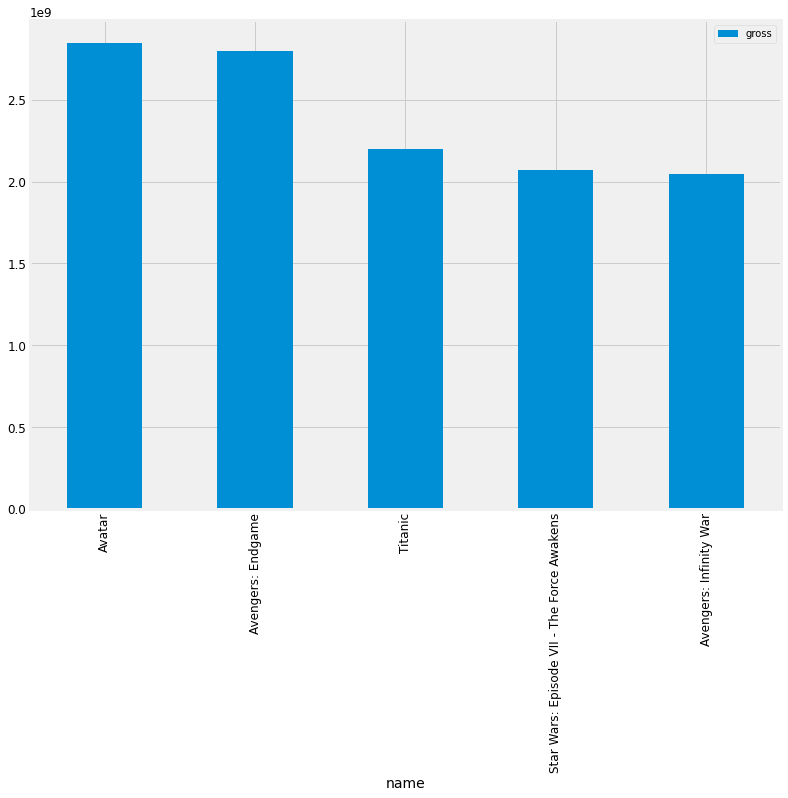

In [33]:
df_top.plot(kind='bar', x='name', y='gross', figsize=[12, 9])

In [34]:
pd.set_option('display.max_rows', None)

It is necessary to get rid of the missing values so it will not affect the correlation between numerical variables.

In [35]:
df = df[df['gross'] != 0]

In [36]:
df = df[df['budget'] != 0]

It is necessary to drop all missing values to avoid problems with the correlation.

In [37]:
df = df.dropna()

### **Searching for duplicates**

As it can be seen, the number of counts (5436) is greater than the number of uniques values (5351). This means that they are duplicates.





In [38]:
df['name'].describe()

count         5436
unique        5351
top       Hercules
freq             3
Name: name, dtype: object

In [39]:
df['name'] = df['name'].drop_duplicates()

In [40]:
df['name'].describe()

count                       5351
unique                      5351
top       Real Women Have Curves
freq                           1
Name: name, dtype: object

### **Correlation**

Let's investigate if it is a correlation between budget and gross

**Scatter Plot**

Text(0.5, 0, 'Budget for Flim')

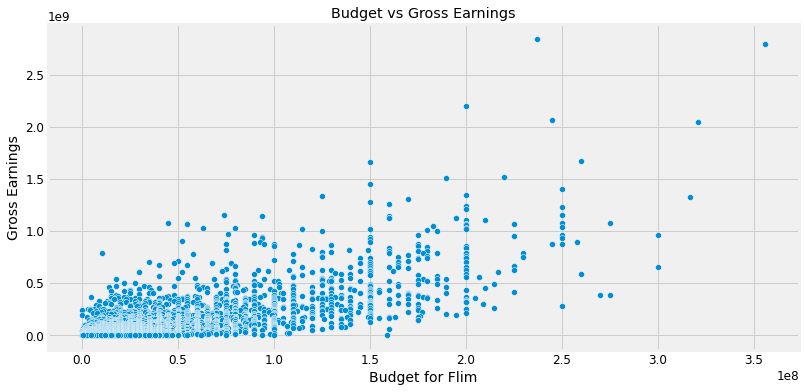

In [42]:
plt.figure(figsize=[12, 6])
sns.scatterplot(x='budget', y='gross', data=df)

plt.title("Budget vs Gross Earnings")

plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Flim')

**Regression Plot**

Text(0.5, 0, 'Budget for Flim')

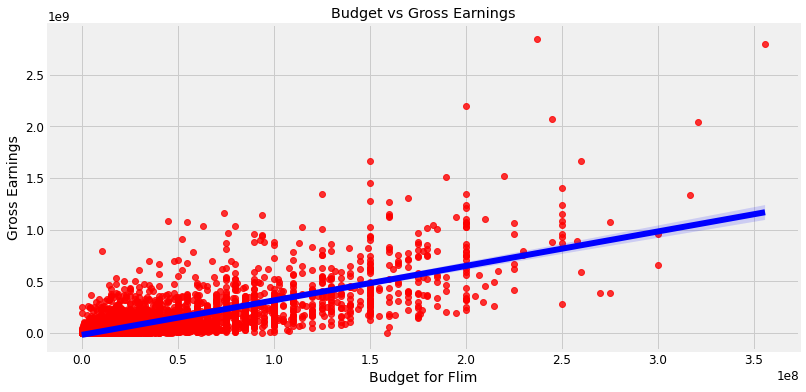

In [43]:
plt.figure(figsize=[12, 6])
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

plt.title("Budget vs Gross Earnings")

plt.ylabel('Gross Earnings')
plt.xlabel('Budget for Flim')

The graph above show a positive correlation between budget and gross. To know how much it is, use the following code:

In [44]:
df[['budget', 'gross']].corr()

,budget,gross
budget,1.000000,0.740395
gross,0.740395,1.000000


There is a 0.74 correlation between budget and gross. Therefore, it is a good correlation. However, let's look what other attributes have a high correlation with gross.

corr() function with all the dataframe can be used, but it will be easier to combine it with a visualization. 

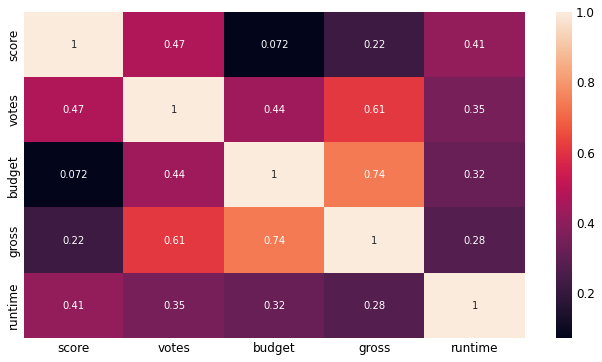

In [45]:
plt.figure(figsize=[10,6])
sns.heatmap(df.corr(), annot=True)

**Categorizing object type columns in order to see correlation**

In [46]:
df_copy = df.copy()

In [47]:
df_copy['released'] = df_copy['released'].astype('object')

In [48]:
for col_name in df_copy.columns:
  if (df_copy[col_name].dtype == 'object'):
    df_copy[col_name] = df_copy[col_name].astype('category')
    df_copy[col_name] = df_copy[col_name].cat.codes

df_copy.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,387,5,0,29,1706,7.8,1100000.0,787,1265,1538,47,237000000,2847246203,1388,162.0,29
7445,389,5,0,39,2342,8.4,903000.0,106,515,1474,47,356000000,2797501328,987,181.0,39
3045,4923,5,6,17,937,7.8,1100000.0,787,1265,1076,47,200000000,2201647264,1388,194.0,17
6663,3656,5,0,35,2131,7.8,876000.0,770,1810,357,47,245000000,2069521700,949,138.0,35
7244,390,5,0,38,2274,8.4,897000.0,106,515,1474,47,321000000,2048359754,987,149.0,38


Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

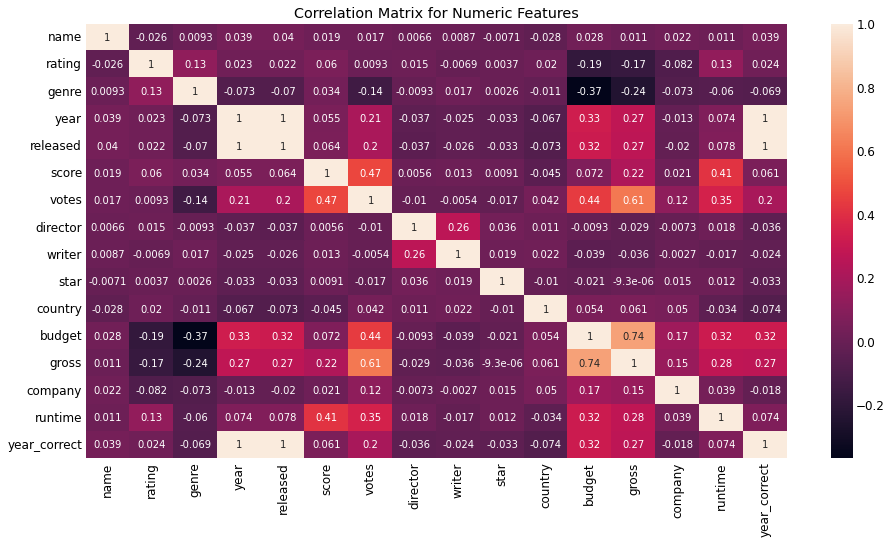

In [49]:
plt.figure(figsize=[14, 8])
sns.heatmap(df_copy.corr(), annot=True)

plt.title('Correlation Matrix for Numeric Features')

In [50]:
correlation_mat = df_copy.corr()

In [51]:
corr_pairs = correlation_mat.unstack()

corr_pairs.head(10)

name  name        1.000000
      rating     -0.025982
      genre       0.009284
      year        0.039022
      released    0.039800
      score       0.019030
      votes       0.017281
      director    0.006567
      writer      0.008749
      star       -0.007116
dtype: float64

In [52]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head(10)

genre   budget   -0.368900
budget  genre    -0.368900
genre   gross    -0.244380
gross   genre    -0.244380
rating  budget   -0.186892
budget  rating   -0.186892
rating  gross    -0.168814
gross   rating   -0.168814
votes   genre    -0.136457
genre   votes    -0.136457
dtype: float64

In [53]:
hight_corr = sorted_pairs[(sorted_pairs) > 0.5]

hight_corr

votes         gross           0.614904
gross         votes           0.614904
              budget          0.740395
budget        gross           0.740395
released      year            0.997550
year          released        0.997550
year_correct  released        0.998541
released      year_correct    0.998541
year          year_correct    0.998641
year_correct  year            0.998641
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correc

**Conclusions:** Gross have a high correlation with budget and votes.